In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data 
digits = datasets.load_digits()

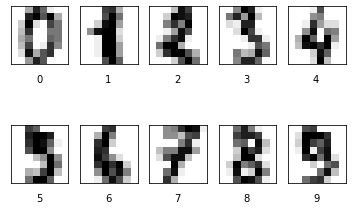

In [3]:
for i in range(1,11):
    # 行数，列数，索引值
    plt.subplot(2,5,i)
    # 参数：cmap 将标量数据映射到色彩图
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    # x, y : scalars 放置text的位置
    # s : str 内容text
    plt.text(3,10,str(digits.target[i-1]))
    # 设置x轴
    plt.xticks([])
    # 设置y轴
    plt.yticks([])
plt.show()

In [4]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25)

In [5]:
# 定义标签，大于5为1，小于5为0
y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [6]:
print(X_train.shape)
print(X_train[:2, :])
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
[[ 0.  0.  8. 16. 14. 15.  0.  0.  0.  0. 13. 11. 15. 11.  0.  0.  0.  4.
  14.  1. 13.  5.  0.  0.  0.  3.  7.  8. 16.  4.  3.  0.  0.  0. 14. 16.
  16. 13.  7.  0.  0.  0.  5. 13.  2.  0.  0.  0.  0.  0.  6. 10.  0.  0.
   0.  0.  0.  0. 10.  6.  0.  0.  0.  0.]
 [ 0.  0.  6. 10.  9.  4.  0.  0.  0.  0. 14. 10. 16. 16.  1.  0.  0.  4.
  15.  1.  9. 16.  0.  0.  0.  3. 16. 16. 16.  8.  0.  0.  0.  0. 12. 14.
  16.  5.  0.  0.  0.  0. 12.  1.  9. 12.  0.  0.  0.  0. 16.  6. 14.  9.
   0.  0.  0.  0.  8. 12.  6.  1.  0.  0.]]
(450, 64)
(1347,)
(450,)


In [7]:
# 定义激活函数
def sigmoid(z):
    s = 1/(1 + np.exp(-1 * z))
    return s

In [8]:
import numpy as np
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


In [9]:
# 初始化参数
def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    # X_train有64个样本，则dim为64，w64*1
    b = 0

    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [10]:
initialize_parameters(2)

(array([[ 1.42770802],
        [-1.46158354]]), 0)

In [11]:
# 前后向传播
def propagate(w,b,X,Y):

    m = X.shape[0]

    # A:1*1347
    A = sigmoid(np.dot(w.T, X.T) + b)
    cost = 0
    for i in range(len(Y)):
        k = A[0][i]
        if k == 1 or k == 0:
            cost += 0
        else:
            j = Y[i] * np.log(A[0][i]) + (1 - Y[i]) * np.log(1 - A[0][i])
            cost += j
    cost = (-1 / m) * cost
    dw = 1 / m * np.dot(X.T, (A.T - np.array(Y).reshape((len(Y),1))))
    db = 1 / m * sum(A[0][i] - Y[i] for i in range(len(Y)))
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    # 把shape中为1的维度去掉
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [12]:
# 梯度下降
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        w = w - 1 * dw * learning_rate
        b = b - 1 * db * learning_rate
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

In [13]:
# 预测
def predict(w, b, X):
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T, X.T) + b)
    
    for i in range(A.shape[1]):
        if A[0][i] > 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [14]:
# 构建模型
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    w, b = initialize_parameters(X_train.shape[1])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    w = params["w"]
    b = params["b"]
    d = {}
    d["w"] = w
    d["b"] = b
    d["cost"] = costs
    Y_train_predict = predict(w, b, X_train)
    Y_test_predict = predict(w, b, X_test)
    count_train = 0
    count_test = 0
    for i in range(len(Y_train)):
        if Y_train_predict[0][i] == Y_train[i]:
            count_train += 1
    for i in range(len(Y_test)):
        if Y_test_predict[0][i] == Y_test[i]:
            count_test += 1
    d["training_accuracy"] = count_train / len(Y_train)
    d["test_accuracy"] = count_test / len(Y_test)
    
    return d

In [15]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = True)
print(d)

{'w': array([[-1.49611026e-01],
       [-7.21162618e-01],
       [-2.03817404e-03],
       [-5.21798240e-01],
       [-1.48704068e-01],
       [ 6.52098763e-01],
       [ 5.35480006e-01],
       [-4.97386952e-01],
       [ 1.20105467e-01],
       [-2.12993819e-01],
       [ 9.80987863e-01],
       [ 6.05619230e-01],
       [-2.10381946e-03],
       [-4.34568739e-01],
       [ 4.45965287e-01],
       [-2.24905205e-01],
       [-8.38360019e-02],
       [-2.23697102e-01],
       [-1.66845343e-01],
       [-2.20958754e-01],
       [-5.78562805e-01],
       [ 1.10056269e-01],
       [-1.23275483e+00],
       [-6.17242259e-01],
       [ 1.52284211e+00],
       [ 9.96435420e-02],
       [ 3.03744138e-01],
       [ 7.70300256e-01],
       [-1.24569496e-01],
       [ 5.13789897e-01],
       [ 2.65060805e-02],
       [ 1.02552834e+00],
       [ 1.32915813e+00],
       [-1.08674619e+00],
       [-2.54248839e-01],
       [ 5.72784583e-01],
       [-2.34985770e-01],
       [ 1.21300984e-01],
      

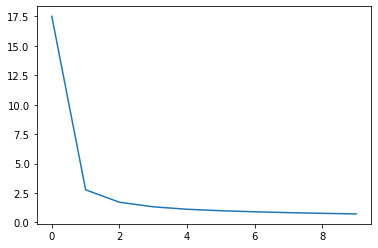

In [16]:
plt.plot(d['cost'])
plt.show()

In [17]:
d1 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = False)
d2 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-4,print_cost = False)
d3 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-6,print_cost = False)

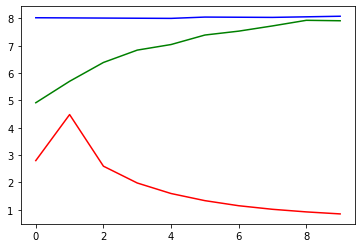

In [18]:
plt.plot(d1['cost'], color = 'red')
plt.plot(d2['cost'], color = 'green')
plt.plot(d3['cost'], color = 'blue')
plt.show()

In [19]:
d4 = model(X_train, y_train, X_test, y_test, num_iterations = 500, learning_rate = 1e-2,print_cost = False)
d5 = model(X_train, y_train, X_test, y_test, num_iterations = 1000, learning_rate = 1e-2,print_cost = False)
d6 = model(X_train, y_train, X_test, y_test, num_iterations = 5000, learning_rate = 1e-2,print_cost = False)
print('迭代{}次，测试准确率{}'.format('500',d4['test_accuracy']))
print('迭代{}次，测试准确率{}'.format('1000',d5['test_accuracy']))
print('迭代{}次，测试准确率{}'.format('5000',d6['test_accuracy']))

迭代500次，测试准确率0.8355555555555556
迭代1000次，测试准确率0.8222222222222222
迭代5000次，测试准确率0.8955555555555555
